In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [22]:
# Loading in data

# A100
a100_clock = pd.read_csv("../results/A100/clock.csv", skiprows=1)
a100_gputimer = pd.read_csv("../results/A100/gputimer.csv", skiprows=1)
a100_timespec = pd.read_csv("../results/A100/timespec.csv", skiprows=1)
a100_clock_b2b = pd.read_csv("../results/A100/clock_b2b.csv", skiprows=1)
a100_gputimer_b2b = pd.read_csv("../results/A100/gputimer_b2b.csv", skiprows=1)
a100_timespec_b2b = pd.read_csv("../results/A100/timespec_b2b.csv", skiprows=1)

# A600
a6000_clock = pd.read_csv("../results/A6000/clock.csv", skiprows=1)
a6000_gputimer = pd.read_csv("../results/A6000/gputimer.csv", skiprows=1)
a6000_timespec = pd.read_csv("../results/A6000/timespec.csv", skiprows=1)
a6000_clock_b2b = pd.read_csv("../results/A6000/clock_b2b.csv", skiprows=1)
a6000_gputimer_b2b = pd.read_csv("../results/A6000/gputimer_b2b.csv", skiprows=1)
a6000_timespec_b2b = pd.read_csv("../results/A6000/timespec_b2b.csv", skiprows=1)

# RTX3090
# Uncomment once RTX3090 results have been computed & add to all_dfs
# rtx3090_clock = pd.read_csv("../results/RTX3090/clock.csv", skiprows=1)
# rtx3090_gputimer = pd.read_csv("../results/RTX3090/gputimer.csv", skiprows=1)
# rtx3090_timespec = pd.read_csv("../results/RTX3090/timespec.csv", skiprows=1)
# rtx3090_clock_b2b = pd.read_csv("../results/RTX3090/clock_b2b.csv", skiprows=1)
# rtx3090_gputimer_b2b = pd.read_csv("../results/RTX3090/gputimer_b2b.csv", skiprows=1)
# rtx3090_timespec_b2b = pd.read_csv("../results/RTX3090/timespec_b2b.csv", skiprows=1)

all_dfs = [a100_clock, a100_gputimer, a100_timespec, a100_clock_b2b, a100_gputimer_b2b, a100_timespec_b2b,
            a6000_clock, a6000_gputimer, a6000_timespec, a6000_clock_b2b, a6000_gputimer_b2b, a6000_timespec_b2b]

In [17]:
# Data wrangling
for df in all_dfs:
    df['gb'] = df.n.mul(4).div(1e9).round(2)
    df['duration_μs'] = df.duration_ns.div(1e3)
    df = df.drop('duration_ns', axis=1)

In [18]:
# General comparison plotting function
def comparison_plot(df1, df2, lab1, lab2, title):
    nrows = 1
    ncols = 1

    fig, ax = plt.subplots(nrows, ncols, figsize = (ncols*20, nrows*8))
    sns.lineplot(data=df1, x='gb', y='duration_μs', label=lab1, ax=ax)
    sns.lineplot(data=df2, x='gb', y='duration_μs', label=lab2, ax=ax)

    ax.set_title(title)
    ax.set(xlabel="Array Size (GB)",
            ylabel="Access Duration (μs)")
    
    return fig, ax

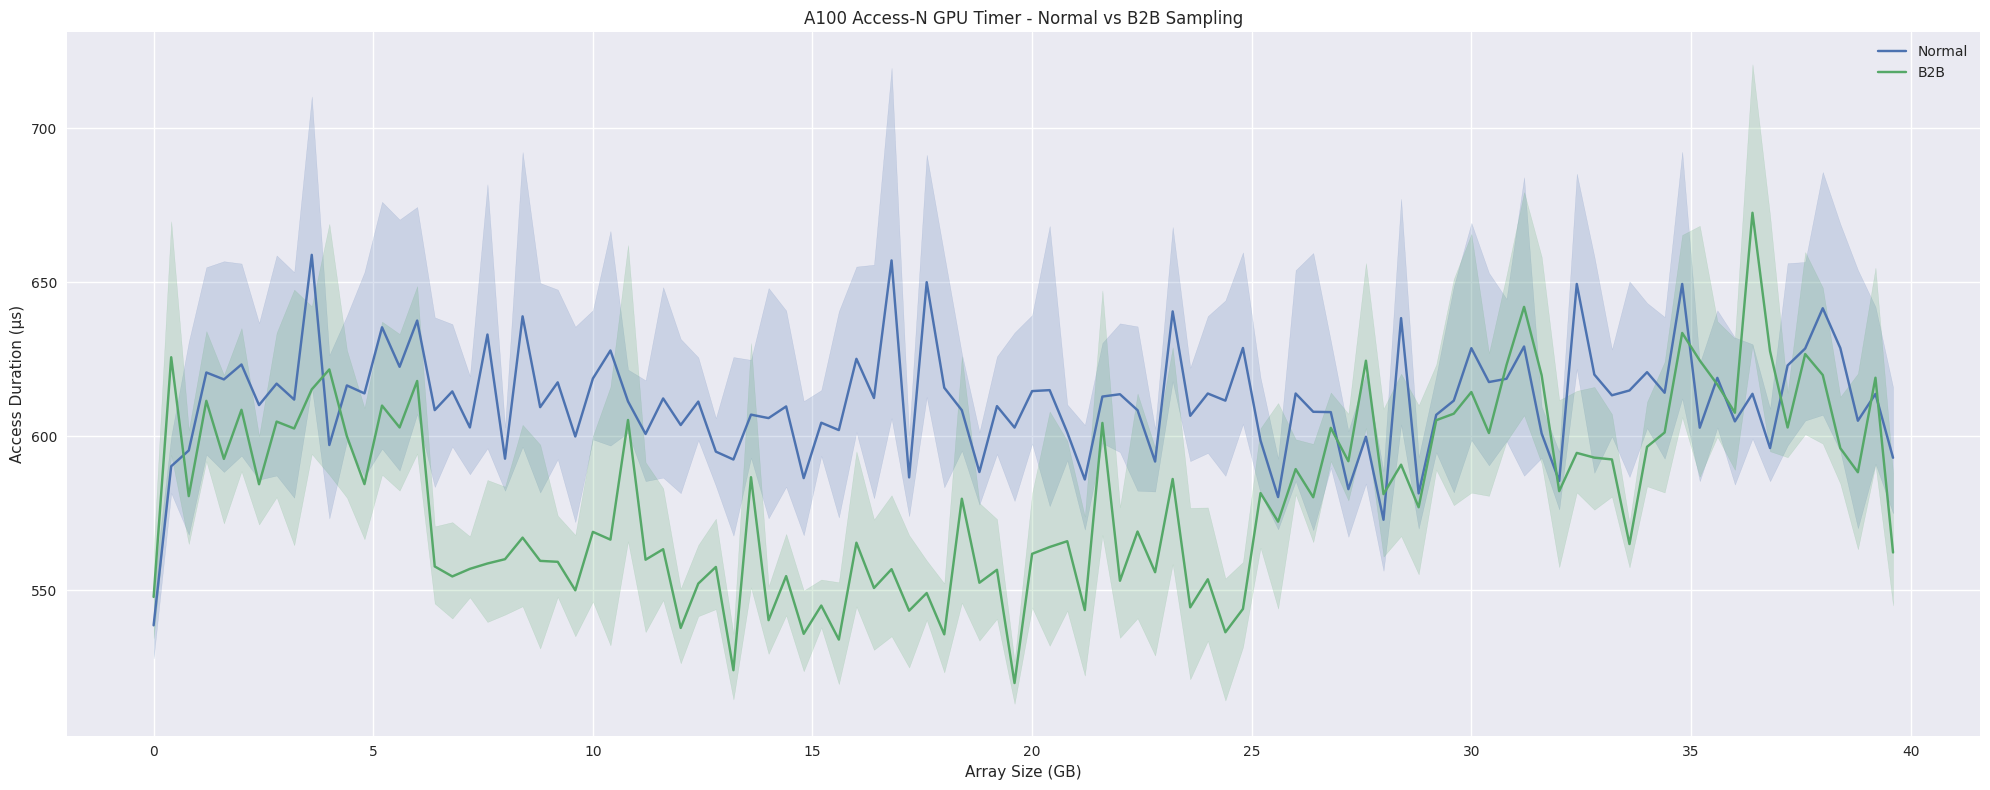

In [19]:
title = "A100 Access-N GPU Timer - Normal vs B2B Sampling"
fig, ax = comparison_plot(a100_gputimer, a100_gputimer_b2b, "Normal", "B2B", title)

plt.tight_layout()
plt.savefig("figures/a100_gputimer_normalvsb2b.png")

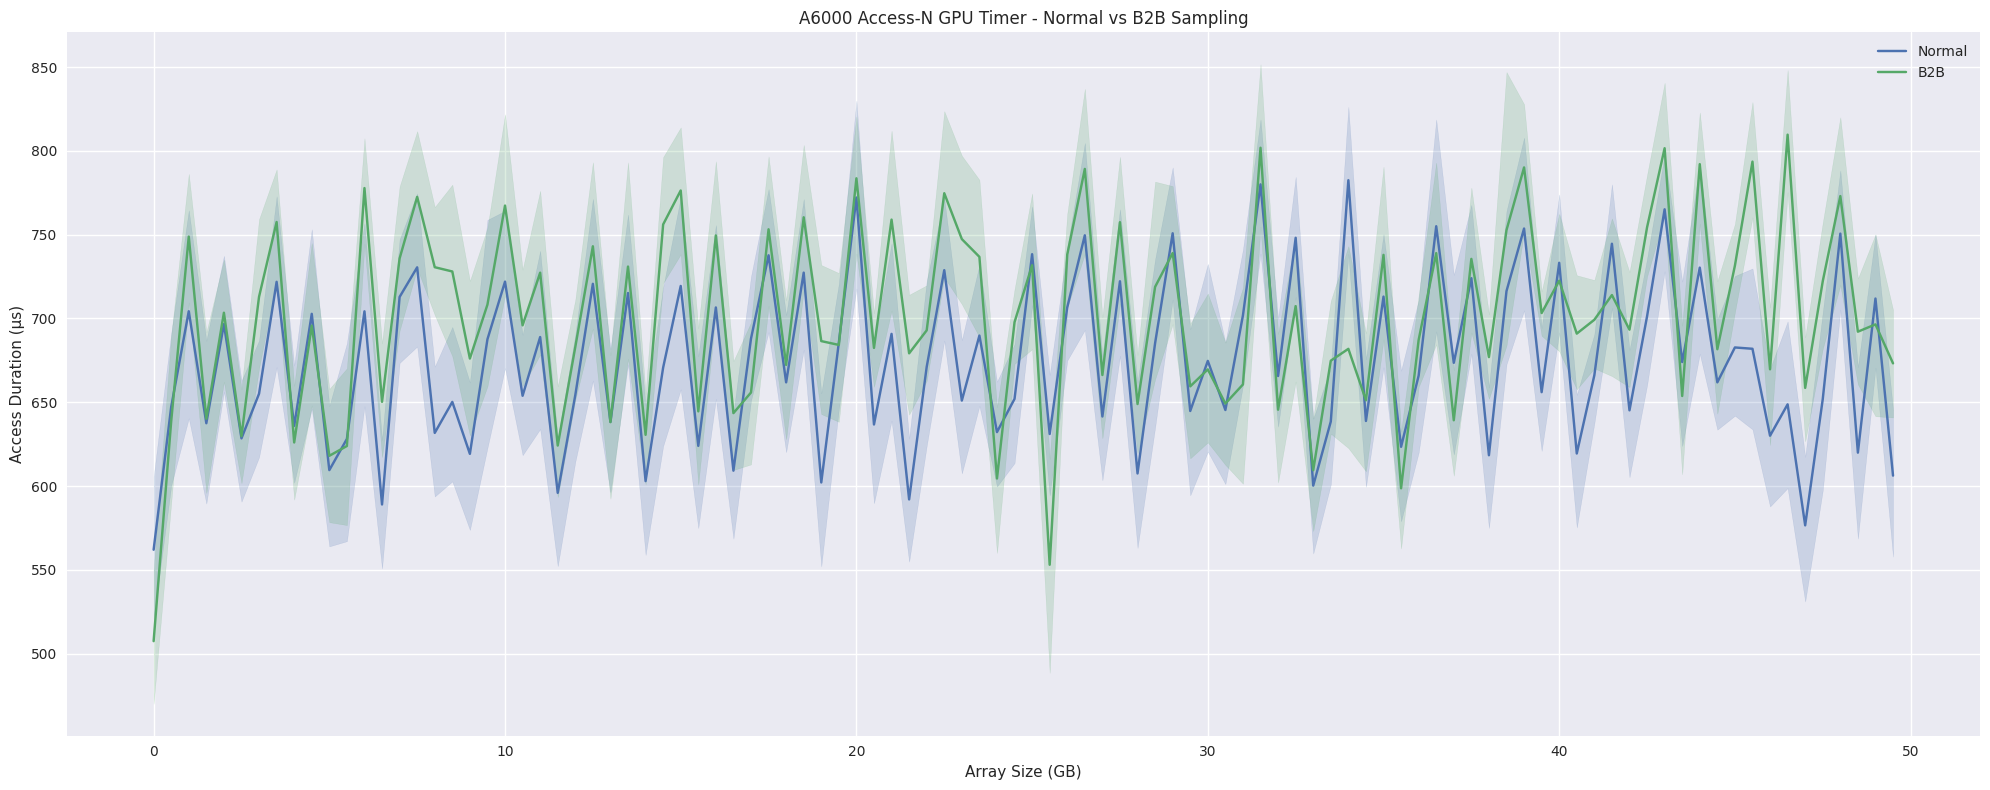

In [20]:
title = "A6000 Access-N GPU Timer - Normal vs B2B Sampling"
fig, ax = comparison_plot(a6000_gputimer, a6000_gputimer_b2b, "Normal", "B2B", title)

plt.tight_layout()
plt.savefig("figures/a6000_gputimer_normalvsb2b.png")

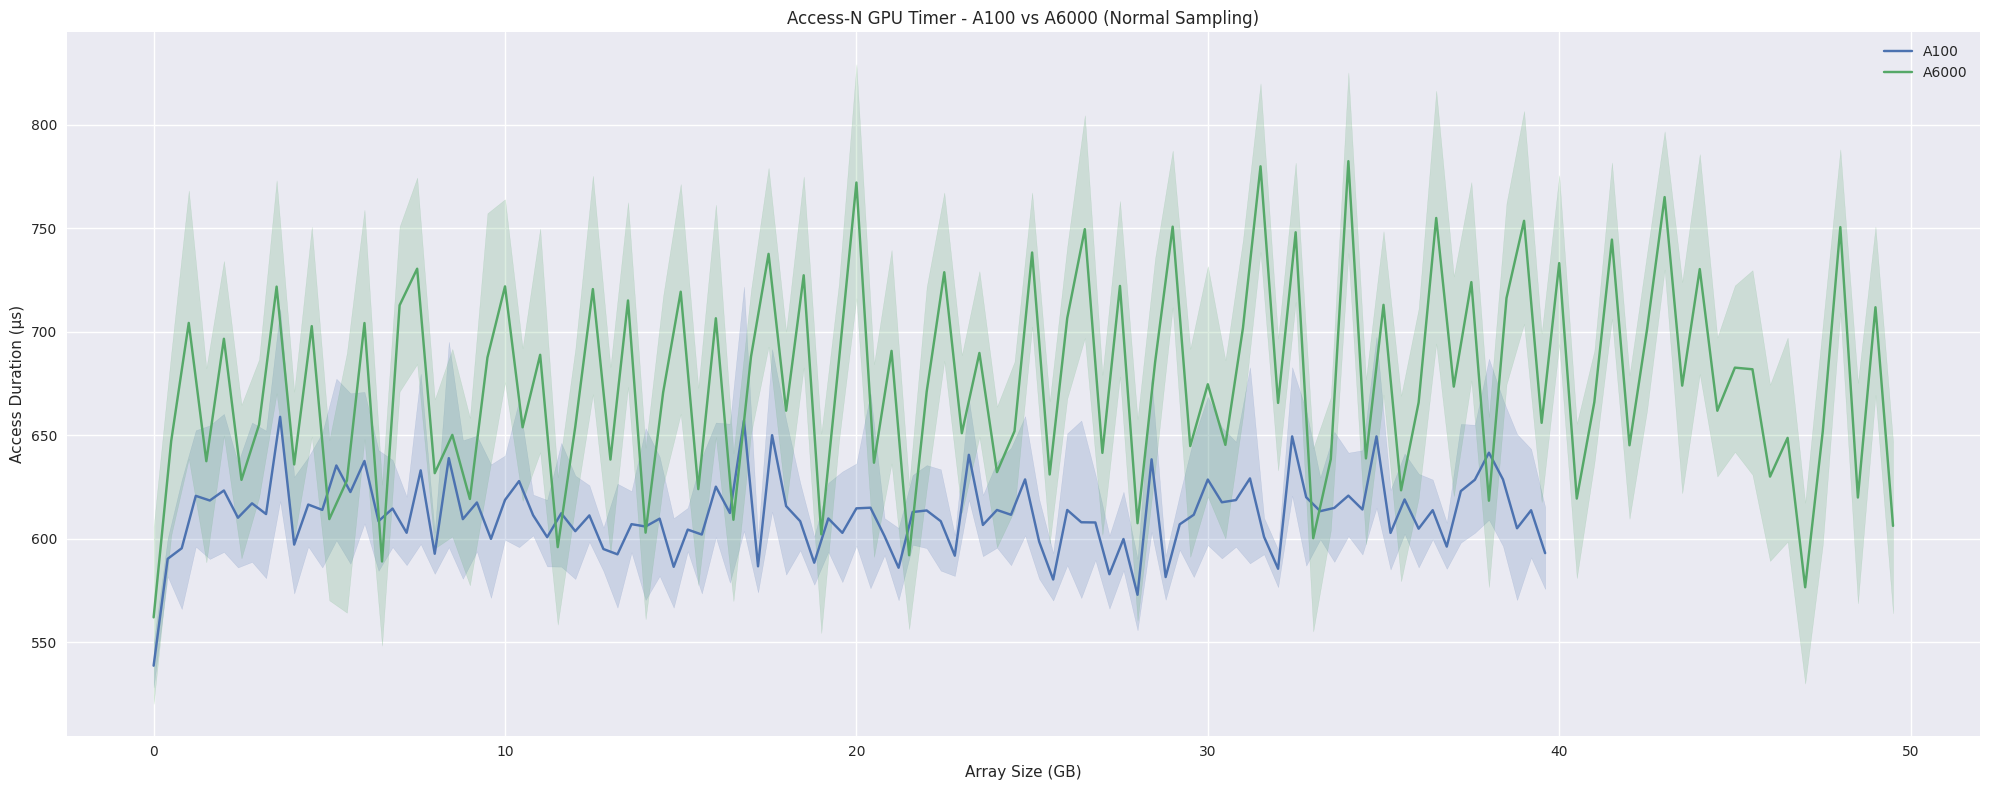

In [21]:
title = "Access-N GPU Timer - A100 vs A6000 (Normal Sampling)"
fig, ax = comparison_plot(a100_gputimer, a6000_gputimer, "A100", "A6000", title)

plt.tight_layout()
plt.savefig("figures/gputimer_a100vsa6000_normal.png")

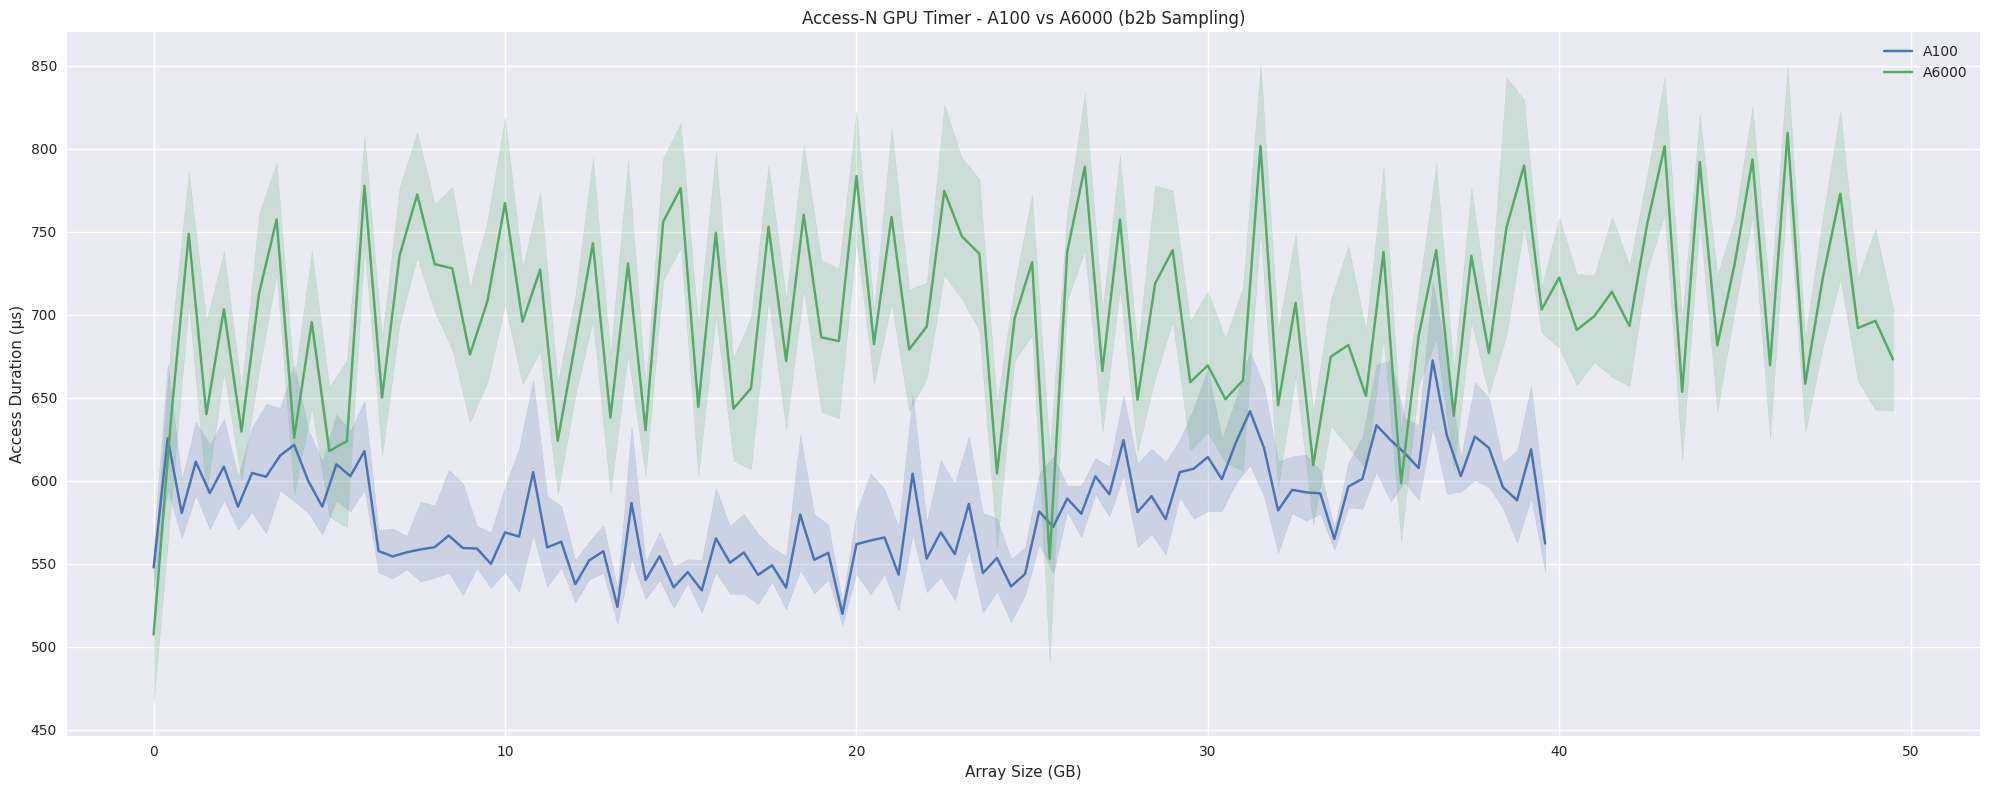

In [13]:
title = "Access-N GPU Timer - A100 vs A6000 (b2b Sampling)"
fig, ax = comparison_plot(a100_gputimer_b2b, a6000_gputimer_b2b, "A100", "A6000", title)

plt.tight_layout()
plt.savefig("figures/gputimer_a100vsa6000_b2b.png")

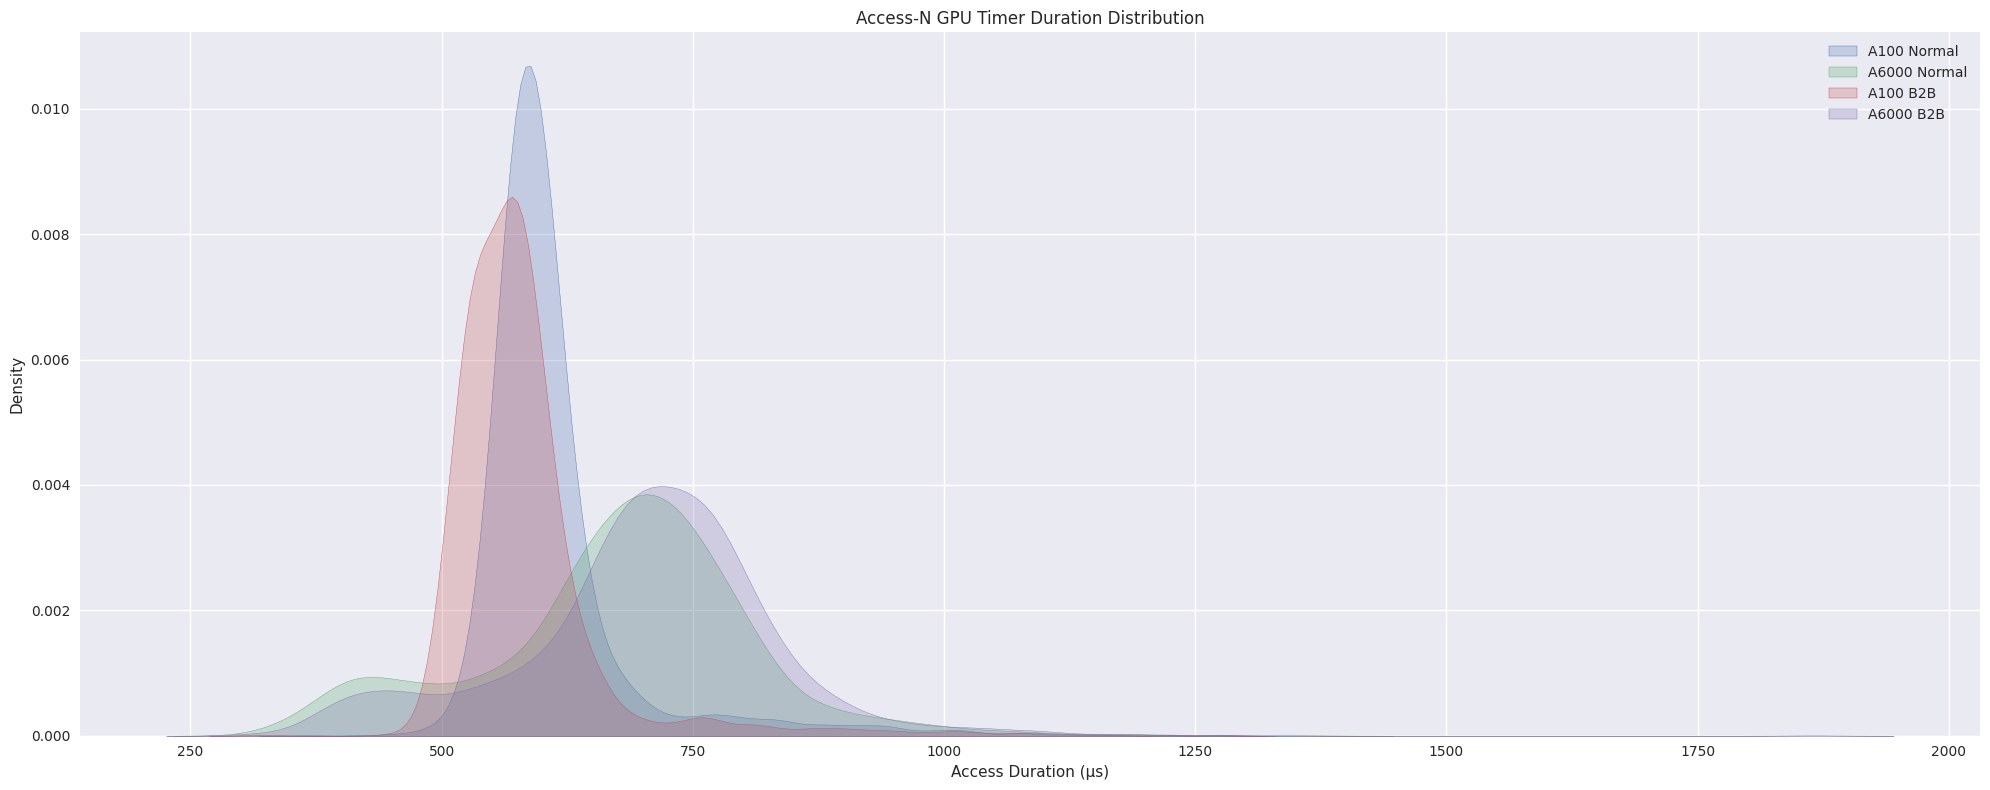

In [14]:
# Histogram of overall access duration results...
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows, ncols, figsize = (ncols*20, nrows*8))

#... for the A100, b2b sampling
sns.kdeplot(data=a100_gputimer, x="duration_μs", label = "A100 Normal", shade=True, ax=ax)
sns.kdeplot(data=a6000_gputimer, x="duration_μs", label = "A6000 Normal", shade=True, ax=ax)
sns.kdeplot(data=a100_gputimer_b2b, x="duration_μs", label = "A100 B2B", shade=True, ax=ax)
sns.kdeplot(data=a6000_gputimer_b2b, x="duration_μs", label = "A6000 B2B", shade=True, ax=ax)

title = "Access-N GPU Timer Duration Distribution"
ax.set_title(title)
ax.set(xlabel="Access Duration (μs)")

plt.tight_layout()
plt.legend()
plt.savefig("figures/gputimer_kde.png")